In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded_train = files.upload()

In [ ]:
training_data = pd.read_csv(io.BytesIO(uploaded_train['train.txt']), sep=' ', header=None)

In [ ]:
training_data_arr =training_data.to_numpy() ;


In [ ]:
class1=[[x[0],x[1]] for x in training_data_arr if x[2]==1]
class2=[[x[0],x[1]] for x in training_data_arr if x[2]==2]

train_class1 = np.array(class1)
train_class2 = np.array(class2)



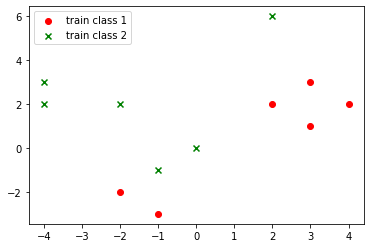

In [ ]:
fig = plt.figure()
plt.scatter(train_class1[:,0], train_class1[:,1], c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_class2[:,0], train_class2[:,1], c = 'g', marker = 'x', label = 'train class 2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# calculating the mean
y1 = np.mat([train_class1[:,0].mean(), train_class1[:,1].mean()]) 
y2 = np.mat([train_class2[:,0].mean(), train_class2[:,1].mean()])


[[1.5 0.5]]
[[-1.5  2. ]]


In [ ]:
uploaded_test = files.upload()

Saving test.txt to test (1).txt


In [ ]:
# reading the test samples
testing_data = pd.read_csv(io.BytesIO(uploaded_test['test.txt']), sep=' ', header=None)
testing_data_arr =testing_data.to_numpy() ;



In [ ]:
test_class1=[[x[0],x[1]] for x in training_data_arr if x[2]==1]
test_class2=[[x[0],x[1]] for x in training_data_arr if x[2]==2]
test_class1 = np.array(class1)
test_class2 = np.array(class2)

In [ ]:
# converting features of test data into matrix
testing_x = [[x[0],x[1]] for x in testing_data_arr ]
testing_x_mat_arr = np.asmatrix(testing_x)
print(testing_x_mat_arr)




[[-1 -5]
 [ 3  2]
 [-2  1]
 [ 8  2]
 [ 6 -1]
 [ 0  2]
 [-3  0]]


In [ ]:
# array for storing the class 1 and class 2 testing data according to minimum distance classifier
testing_x_class1 = np.empty(( 0, 2))
testing_x_class2 = np.empty(( 0, 2))
# list for storing the predictions
accuracy = []


In [ ]:
# minimum distance classifier with respect to class 'mean'
for i in range(len(testing_x_mat_arr)):
  g1 = (y1 * testing_x_mat_arr[i].transpose() ) - (0.5 * (y1 * y1.transpose()))
  g2 = (y2 * testing_x_mat_arr[i].transpose() )- (0.5 * (y2 * y2.transpose()))
  if g1 > g2 :
    testing_x_class1 = np.append(testing_x_class1, [[testing_x_mat_arr[i].item(0), testing_x_mat_arr[i].item(1)]], axis=0)
    accuracy.append(1)
  else:
    testing_x_class2 = np.append(testing_x_class2, [[testing_x_mat_arr[i].item(0), testing_x_mat_arr[i].item(1)]], axis=0)
    accuracy.append(2)


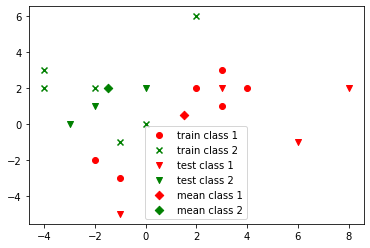

In [ ]:

# plotting the training samples
plt.scatter(train_class1[:,0], train_class1[:,1], c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_class2[:,0], train_class2[:,1], c = 'g', marker = 'x', label = 'train class 2')
# plotting the testing samples
plt.scatter(testing_x_class1[:, 0], testing_x_class1[:, 1], c = 'r', marker = "v", label = 'test class 1')
plt.scatter(testing_x_class2[:, 0], testing_x_class2[:, 1], c = 'g', marker = "v", label = 'test class 2')
# plotting the means
plt.scatter(y1.item(0), y1.item(1), c = 'r', marker = "D", label = 'mean class 1')
plt.scatter(y2.item(0), y2.item(1), c = 'g', marker = "D", label = 'mean class 2')

plt.legend(loc = "best")



plt.show()

In [ ]:
x_db = []
y_db = []
for i in range(train_class1[:,0].min(), train_class1[:,0].max()+1):
  x_db.append(i)
  j = ((3 * i) + 1.875) / 1.5 
  y_db.append(j)

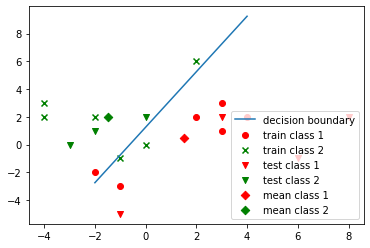

In [ ]:
# plotting the training samples
plt.scatter(train_class1[:,0], train_class1[:,1], c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_class2[:,0], train_class2[:,1], c = 'g', marker = 'x', label = 'train class 2')
# plotting the testing samples
plt.scatter(testing_x_class1[:, 0], testing_x_class1[:, 1], c = 'r', marker = "v", label = 'test class 1')
plt.scatter(testing_x_class2[:, 0], testing_x_class2[:, 1], c = 'g', marker = "v", label = 'test class 2')
# plotting the means
plt.scatter(y1.item(0), y1.item(1), c = 'r', marker = "D", label = 'mean class 1')
plt.scatter(y2.item(0), y2.item(1), c = 'g', marker = "D", label = 'mean class 2')
# plotting decision boundary
plt.plot( x_db, y_db, label = 'decision boundary')

plt.legend(loc = 'best')

plt.show()

In [ ]:
# measuring accuracy
counter = 0
for i in range(len(testing_data[2])):
  if accuracy[i] == testing_data[2][i]:
    counter += 1

accuracy = (counter / len(testing_data[2])) * 100
print("accuracy = " , accuracy)


accuracy =  85.71428571428571
